In [1]:
%pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import ydata_profiling as pp


df = pd.read_csv('KaggleV2-May-2016.csv')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], inplace=True)



In [8]:

df['DayOfWeek'].value_counts()

DayOfWeek
Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: count, dtype: int64

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['No-show'] = le.fit_transform(df['No-show'])  # 'No' -> 0, 'Yes' -> 1


categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'No-show']

# One-hot encode the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)

df.head()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_M,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,62,0,1,0,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,0,0,0,0
2,62,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0,0,0,0,0,0


In [10]:
# Calculate correlation with respect to 'No-show'
correlations = df.corr(numeric_only=True)['No-show'].sort_values(ascending=False)


print(correlations)


No-show                1.000000
SMS_received           0.126431
Scholarship            0.029135
DayOfWeek_Monday       0.005751
DayOfWeek_Saturday     0.001350
Alcoholism            -0.000196
DayOfWeek_Tuesday     -0.001364
Gender_M              -0.004119
Handcap               -0.006076
DayOfWeek_Wednesday   -0.006941
DayOfWeek_Thursday    -0.008988
Diabetes              -0.015180
Hipertension          -0.035701
Age                   -0.060319
Name: No-show, dtype: float64


In [11]:
df['No-show'].value_counts()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])


In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('No-show', axis=1)
y = df['No-show']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight



In [24]:
def get_class_weights(y):
    weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    return {i: weight for i, weight in enumerate(weights)}

def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

In [25]:

def linear_forward(A_prev, W, b):
    Z = np.dot(W.T, A_prev) + b
    A = sigmoid(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

def L_layer_forward(X, parameters):
    A = X
    caches = []
    L = len(parameters) // 2
    for l in range(1, L + 1):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        A, cache = linear_forward(A_prev, W, b)
        caches.append(cache)
    return A, caches

In [26]:



def compute_loss(y, y_hat):
    m = y.shape[1]
    loss = -np.sum(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8)) / m
    return loss

def update_parameters(parameters, caches, y_true, y_hat, learning_rate, class_weight):
    L = len(caches)
    m = y_hat.shape[1]
    dA = -(class_weight) * (y_true / y_hat - (1 - y_true) / (1 - y_hat))
    
    for l in reversed(range(L)):
        A_prev, W, b, Z = caches[l]
        dZ = dA * sigmoid_derivative(Z)
        dW = np.dot(A_prev, dZ.T)
        db = np.sum(dZ, axis=1, keepdims=True)
        dA = np.dot(W, dZ)
        parameters['W' + str(l+1)] -= learning_rate * dW
        parameters['b' + str(l+1)] -= learning_rate * db

Threshold	Count (< threshold)
0.05		22106
0.10		22106
0.15		16622
0.20		8783
0.25		5174
0.30		4068
0.35		0
0.40		0
0.45		0
0.50		0
0.55		0
0.60		0
0.65		0
0.70		0
0.75		0
0.80		0
0.85		0
0.90		0
0.95		0
1.00		0
Train Accuracy: 0.5265378134153651
Test Accuracy: 0.5295394915407582
F1 Score (Test): 0.36616284739151633
Confusion Matrix (Test):
 [[8702 8940]
 [1460 3004]]


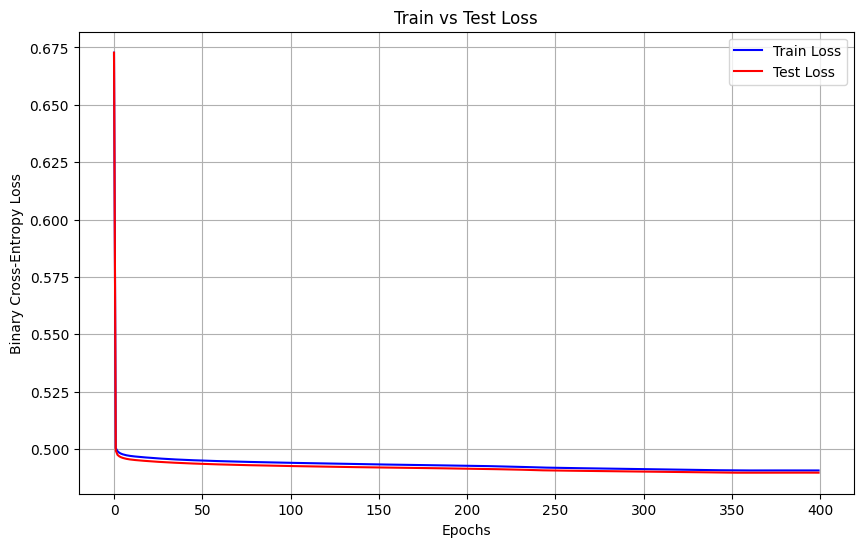

In [ ]:

# ----- Training setup -----
layer_dims = [X_train.shape[1],3,3,1]  # Increased complexity
parameters = initialize_parameters(layer_dims)
class_weights = get_class_weights(y_train)
class_weights[1] *=4 # Amplify minority class

train_losses = []
test_losses = []

initial_lr = 0.01
final_lr = 0.00001
epochs = 400
batch_size = 200

# ----- Training loop -----
for i in range(epochs):
    # Linear LR decay
    learning_rate = initial_lr - ((initial_lr - final_lr) / epochs) * i

    # Full forward pass
    y_hat_train, _ = L_layer_forward(X_train.T, parameters)
    y_hat_test, _ = L_layer_forward(X_test.T, parameters)

    # Compute and store loss
    train_loss = compute_loss(y_train.values.reshape(1, -1), y_hat_train)
    test_loss = compute_loss(y_test.values.reshape(1, -1), y_hat_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Batch updates
    n_batches = X_train.shape[0] // batch_size
    for batch in range(n_batches):
        start = batch * batch_size
        end = start + batch_size
        x_batch = X_train.iloc[start:end].values.T
        y_batch = y_train.iloc[start:end].values.reshape(1, -1)
        y_hat_batch, caches = L_layer_forward(x_batch, parameters)
        weights = np.array([class_weights[y] for y in y_batch.flatten()])
        avg_weight = np.mean(weights)
        update_parameters(parameters, caches, y_batch, y_hat_batch,
                          learning_rate=learning_rate, class_weight=avg_weight)


Threshold	Count (< threshold)
0.05		22106
0.10		22106
0.15		16622
0.20		8783
0.25		5174
0.30		4068
0.35		0
0.40		0
0.45		0
0.50		0
0.55		0
0.60		0
0.65		0
0.70		0
0.75		0
0.80		0
0.85		0
0.90		0
0.95		0
1.00		0
Train Accuracy: 0.5265378134153651
Test Accuracy: 0.5295394915407582
F1 Score (Test): 0.36616284739151633
Confusion Matrix (Test):
 [[8702 8940]
 [1460 3004]]


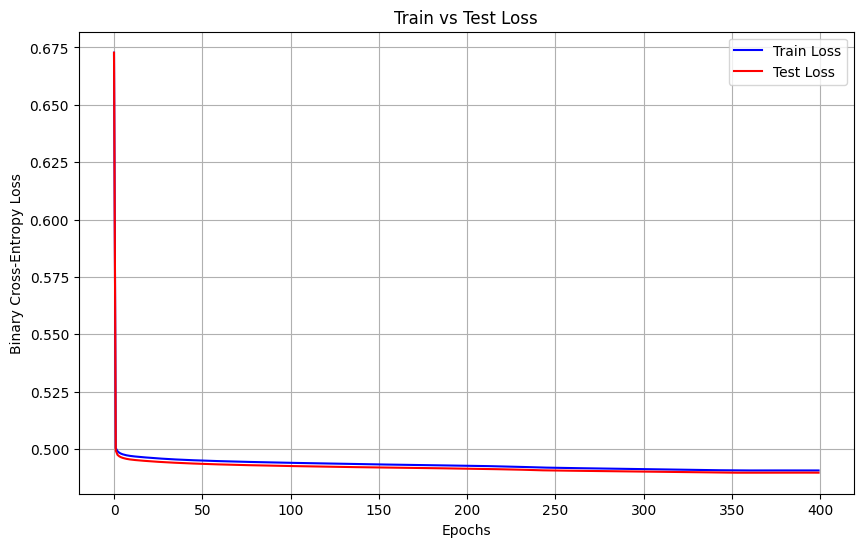

In [23]:
# ----- Evaluation -----
y_hat_train_final, _ = L_layer_forward(X_train.T, parameters)
y_hat_test_final, _ = L_layer_forward(X_test.T, parameters)
y_pred_train = (y_hat_train_final.flatten() > 0.18).astype(int)
y_pred_test = (y_hat_test_final.flatten() > 0.18).astype(int)
thresholds = np.arange(0.05, 1.05, 0.05)  # Thresholds from 0.05 to 1.0
probs = y_hat_test_final.flatten()

print("Threshold\tCount (< threshold)")
for th in thresholds:
    count = np.sum(probs > th)
    print(f"{th:.2f}\t\t{count}")

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("F1 Score (Test):", f1_score(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))

# ----- Loss plot -----
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()